<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Mag_Decomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error (MSE): 0.11629175732395951
R-squared (R2): 0.7643252866070881


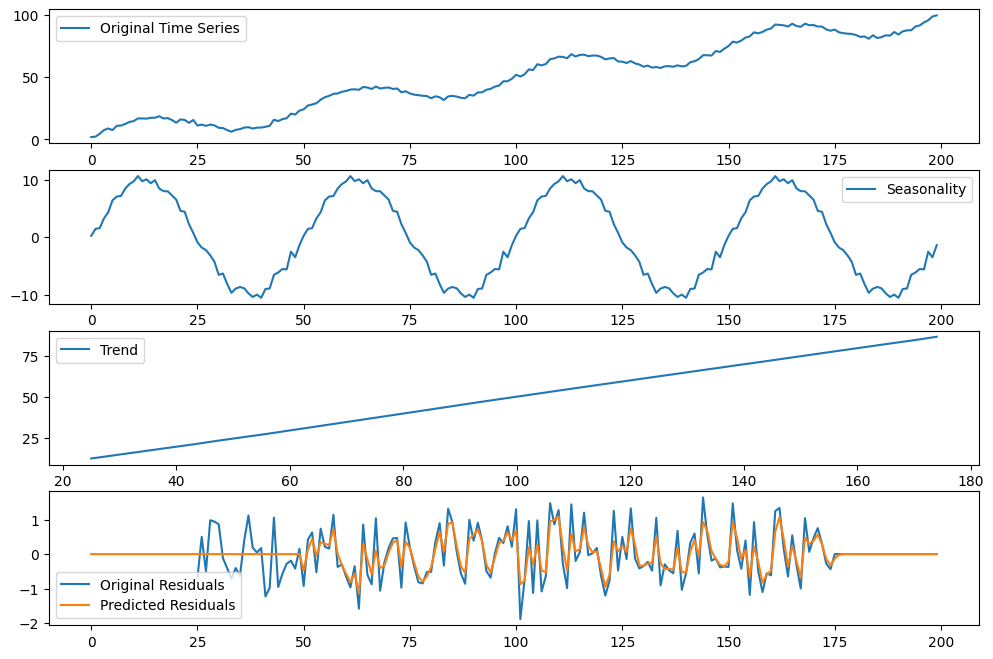

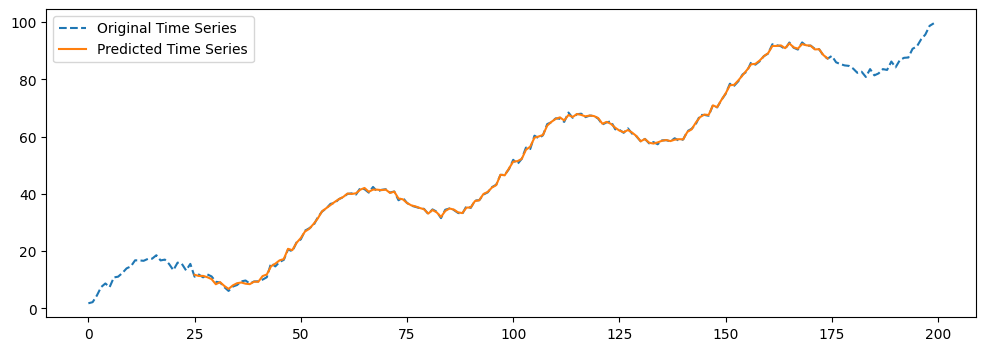

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate Synthetic Time Series Data
np.random.seed(0)
n = 200
t = np.arange(0, n)
seasonality = 10 * np.sin(2 * np.pi * t / 50)
trend = 0.5 * t
noise = np.random.normal(0, 1, n)
synthetic_data = seasonality + trend + noise

# Step 2: Decompose the Time Series
result = seasonal_decompose(synthetic_data, model='additive', period=50)
seasonal = result.seasonal
trend = result.trend
residual = result.resid

# Step 3: Predict Residuals with a Random Forest Model
X = np.arange(50, n).reshape(-1, 1)
y = residual[50:]
y[np.isnan(y)] = 0  # Replace NaN values with zeros
X = X[:len(y)]

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)
y_pred = model.predict(X)

# Step 4: Reconstruct the Predicted Time Series
predicted_residual = np.concatenate((np.zeros(50), y_pred))
predicted_residual = predicted_residual[:len(residual)]
predicted_time_series = seasonal + trend + predicted_residual

# Step 5: Evaluate the Model and Plot the Results
mse = mean_squared_error(residual[50:], predicted_residual[50:])
r2 = r2_score(residual[50:], predicted_residual[50:])
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(synthetic_data, label='Original Time Series')
plt.legend()
plt.subplot(412)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(413)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Original Residuals')
plt.plot(predicted_residual, label='Predicted Residuals')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(synthetic_data, label='Original Time Series', linestyle='--')
plt.plot(predicted_time_series, label='Predicted Time Series')
plt.legend()
plt.show()
